In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data
cars_df = pd.read_csv('auto.csv')
cars_df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
# Assigning headers to the data
headers = ['symboling','normalized_losses','make','fuel_type','aspiration', 'num_of_doors','body_style',
         'drive_wheels','engine_location','wheel_base', 'length','width','height','curb_weight','engine_type',
         'num_of_cylinders', 'engine_size','fuel_system','bore','stroke','compression_ratio','horsepower',
         'peak_rpm','city_mpg','highway_mpg','price']
cars_df.columns = headers
cars_df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
# Replace "?" to NaN
cars_df.replace("?", np.nan, inplace=True)

In [5]:
# Counting Missing Values
missing_data = cars_df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts(),"\n")


symboling
False    204
Name: symboling, dtype: int64 

normalized_losses
False    164
True      40
Name: normalized_losses, dtype: int64 

make
False    204
Name: make, dtype: int64 

fuel_type
False    204
Name: fuel_type, dtype: int64 

aspiration
False    204
Name: aspiration, dtype: int64 

num_of_doors
False    202
True       2
Name: num_of_doors, dtype: int64 

body_style
False    204
Name: body_style, dtype: int64 

drive_wheels
False    204
Name: drive_wheels, dtype: int64 

engine_location
False    204
Name: engine_location, dtype: int64 

wheel_base
False    204
Name: wheel_base, dtype: int64 

length
False    204
Name: length, dtype: int64 

width
False    204
Name: width, dtype: int64 

height
False    204
Name: height, dtype: int64 

curb_weight
False    204
Name: curb_weight, dtype: int64 

engine_type
False    204
Name: engine_type, dtype: int64 

num_of_cylinders
False    204
Name: num_of_cylinders, dtype: int64 

engine_size
False    204
Name: engine_size, dtype: int64

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [6]:
# replace them with mean

avg_norm = cars_df['normalized_losses'].astype('float').mean(axis=0)
cars_df.replace(np.nan, avg_norm, inplace = True)

avg_stroke = cars_df['stroke'].astype('float').mean(axis=0)
cars_df.replace(np.nan, avg_norm, inplace = True)

avg_bore = cars_df['bore'].astype('float').mean(axis=0)
cars_df.replace(np.nan, avg_norm, inplace = True)

avg_horsepower = cars_df['horsepower'].astype('float').mean(axis=0)
cars_df.replace(np.nan, avg_norm, inplace = True)

avg_peak = cars_df['peak_rpm'].astype('float').mean(axis=0)
cars_df.replace(np.nan, avg_norm, inplace = True)

In [7]:
# Replace by frequency

cars_df.replace(np.nan, 'four', inplace = True)

In [8]:
# droping the whole row

cars_df.dropna(subset=['price'], axis=0, inplace=True)
cars_df.reset_index(drop=True, inplace=True)

In [9]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized_losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel_type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num_of_doors       204 non-null    object 
 6   body_style         204 non-null    object 
 7   drive_wheels       204 non-null    object 
 8   engine_location    204 non-null    object 
 9   wheel_base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb_weight        204 non-null    int64  
 14  engine_type        204 non-null    object 
 15  num_of_cylinders   204 non-null    object 
 16  engine_size        204 non

In [10]:
# Correcting data format

cars_df[["bore", "stroke"]] = cars_df[["bore", "stroke"]].astype("float")
cars_df[["normalized_losses","horsepower"]] = cars_df[["normalized_losses","horsepower"]].astype("int")
cars_df[["price"]] = cars_df[["price"]].astype("float")
cars_df[["peak_rpm"]] = cars_df[["peak_rpm"]].astype("float")

<h2> Data Standardization </h2>

In [11]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)

cars_df['city_L/100km'] = 235/cars_df["city_mpg"]
cars_df = cars_df.drop("city_mpg", 1)

cars_df['highway_L/100km'] = 235/cars_df['highway_mpg']
cars_df = cars_df.drop("highway_mpg", 1)

In [12]:
cars_df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'price', 'city_L/100km',
       'highway_L/100km'],
      dtype='object')

<h2> Data Normalization </h2>

In [13]:
# Normalize some variables so their value ranges from 0 to 1

cars_df['length'] = cars_df['length']/cars_df['length'].max()
cars_df['width'] = cars_df['length']/cars_df['length'].max()
cars_df['height'] = cars_df['length']/cars_df['length'].max()

<h2> Binning </h2>

Text(0.5, 1.0, 'horsepower bins')

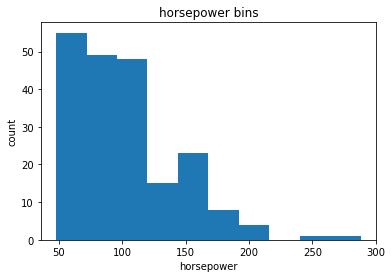

In [14]:
# Initial Visualization of horsepower

plt.hist(cars_df['horsepower'])

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [15]:
# Using linspace(start_value, end_value, numbers_generated)

bins = np.linspace(min(cars_df['horsepower']), max(cars_df['horsepower']), 4)
bins

array([ 48., 128., 208., 288.])

In [16]:
group_names = ['Low','Medium','High']

cars_df['horsepower_binned'] = pd.cut(cars_df['horsepower'], bins, labels=group_names, include_lowest=True)
cars_df[['horsepower','horsepower_binned']].head(10)

,horsepower,horsepower_binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,160,Medium
9,101,Low


In [17]:
cars_df['horsepower_binned'].value_counts()

Low       162
Medium     40
High        2
Name: horsepower_binned, dtype: int64

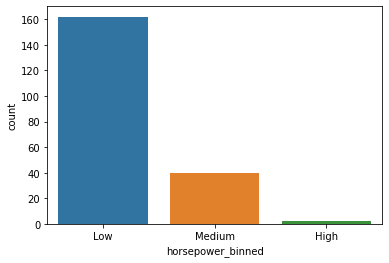

In [18]:
import seaborn as sns

sns.countplot(cars_df['horsepower_binned'])

<h2> Indicator variable (or dummy variable) </h2>

In [19]:
cars_df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'price', 'city_L/100km',
       'highway_L/100km', 'horsepower_binned'],
      dtype='object')

In [20]:
# Assigning numerical values to categorical data

fuel_dummy = pd.get_dummies(cars_df['fuel_type'])
cars_df = pd.concat([cars_df, fuel_dummy], axis=1)

cars_df.drop("fuel_type", axis = 1, inplace=True)

In [21]:
aspiration_dummy = pd.get_dummies(cars_df['aspiration'])
cars_df = pd.concat([cars_df, aspiration_dummy], axis=1)

cars_df.drop("aspiration", axis = 1, inplace=True)

In [22]:
cars_df.head()

,symboling,normalized_losses,make,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,horsepower,peak_rpm,price,city_L/100km,highway_L/100km,horsepower_binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.811148,...,111,5000.0,16500.0,11.190476,8.703704,Low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.822681,...,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.848630,...,102,5500.0,13950.0,9.791667,7.833333,Low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.848630,...,115,5500.0,17450.0,13.055556,10.681818,Low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.851994,...,110,5500.0,15250.0,12.368421,9.400000,Low,0,1,1,0


In [23]:
# To save the clean CSV file

cars_df.to_csv('clean_cars_df.csv')

<h2>Correlation</h2>

In [24]:
cars_df.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,price,city_L/100km,highway_L/100km,diesel,gas,std,turbo
symboling,1.000000,0.468695,-0.525095,-0.356792,-0.356792,-0.356792,-0.229281,-0.107229,0.246764,0.249126,-0.177413,0.071017,0.183109,-0.072695,0.059512,-0.033552,-0.192995,0.192995,0.056306,-0.056306
normalized_losses,0.468695,1.000000,-0.056919,0.019217,0.019217,0.019217,0.097785,0.110998,0.124490,0.126016,-0.114548,0.203249,0.165321,0.130574,0.232815,0.178584,-0.101464,0.101464,0.006826,-0.006826
wheel_base,-0.525095,-0.056919,1.000000,0.877612,0.877612,0.877612,0.781763,0.573989,-0.074746,-0.080123,0.249199,0.353563,-0.221759,0.583647,0.481709,0.585439,0.307866,-0.307866,-0.255656,0.255656
length,-0.356792,0.019217,0.877612,1.000000,1.000000,1.000000,0.878090,0.683830,-0.048188,-0.055797,0.157913,0.556345,-0.229493,0.685614,0.660849,0.712904,0.212142,-0.212142,-0.233788,0.233788
width,-0.356792,0.019217,0.877612,1.000000,1.000000,1.000000,0.878090,0.683830,-0.048188,-0.055797,0.157913,0.556345,-0.229493,0.685614,0.660849,0.712904,0.212142,-0.212142,-0.233788,0.233788
height,-0.356792,0.019217,0.877612,1.000000,1.000000,1.000000,0.878090,0.683830,-0.048188,-0.055797,0.157913,0.556345,-0.229493,0.685614,0.660849,0.712904,0.212142,-0.212142,-0.233788,0.233788
curb_weight,-0.229281,0.097785,0.781763,0.878090,0.878090,0.878090,1.000000,0.850611,-0.028528,-0.035990,0.151372,0.749993,-0.180219,0.800162,0.792400,0.837039,0.217310,-0.217310,-0.325044,0.325044
engine_size,-0.107229,0.110998,0.573989,0.683830,0.683830,0.683830,0.850611,1.000000,-0.175090,-0.180813,0.029083,0.810463,-0.178793,0.838501,0.745213,0.777206,0.069734,-0.069734,-0.108449,0.108449
bore,0.246764,0.124490,-0.074746,-0.048188,-0.048188,-0.048188,-0.028528,-0.175090,1.000000,0.999670,-0.026541,0.027737,0.186807,0.009866,0.234359,0.176253,-0.045708,0.045708,0.063036,-0.063036
stroke,0.249126,0.126016,-0.080123,-0.055797,-0.055797,-0.055797,-0.035990,-0.180813,0.999670,1.000000,-0.023143,0.020122,0.186577,0.002916,0.226114,0.168298,-0.042068,0.042068,0.062388,-0.062388


(0.0, 52583.84979253987)

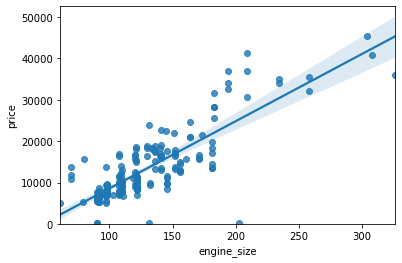

In [25]:
# visualizing correlation for continues variables

sns.regplot(x='engine_size',y='price',data=cars_df)
plt.ylim(0,)

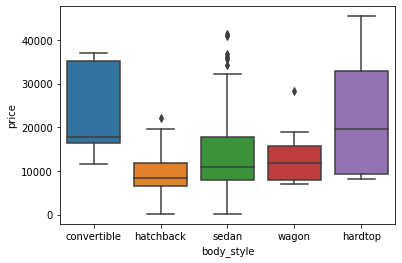

In [26]:
# visualizing correlation for categorical variables

sns.boxplot(x='body_style',y='price',data=cars_df)

In [27]:
# Grouping results
group_1 = cars_df[['drive_wheels','body_style','price']]
grouped_test1 = group_1.groupby(['drive_wheels','body_style'],as_index=False).mean()
grouped_test1

,drive_wheels,body_style,price
0,4wd,hatchback,3862.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9471.807018
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [28]:
# Creating Pivot table

group_pivot = grouped_test1.pivot(index='drive_wheels', columns='body_style')
group_pivot = group_pivot.fillna(0)
group_pivot

price                                            \
body_style   convertible       hardtop     hatchback         sedan   
drive_wheels                                                         
4wd                 0.00      0.000000   3862.500000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9471.807018   
rwd             26563.25  24202.714286  13589.578947  21711.833333   

                            
body_style           wagon  
drive_wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

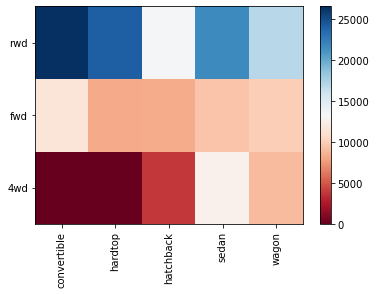

In [29]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

#Label Names
row_label = group_pivot.columns.levels[1]
col_label = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_label, minor = False)
ax.set_yticklabels(col_label, minor = False)

plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

In [30]:
# Train test split
from sklearn.model_selection import train_test_split

y_data = cars_df[['price']]
x_data = cars_df.drop('price',1)

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.15,random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 173


In [31]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression
lr = LinearRegression()
lr.fit(x_train[['engine_size']], y_train)

LinearRegression()

In [32]:
print("training Accuracy ",lr.score(x_train[['engine_size']],y_train))
print("testing Accuracy ",lr.score(x_test[['engine_size']],y_test))

training Accuracy  0.6958704502477568
testing Accuracy  0.7220459949785099


In [33]:
yhat_train = lr.predict(x_train[['engine_size']])

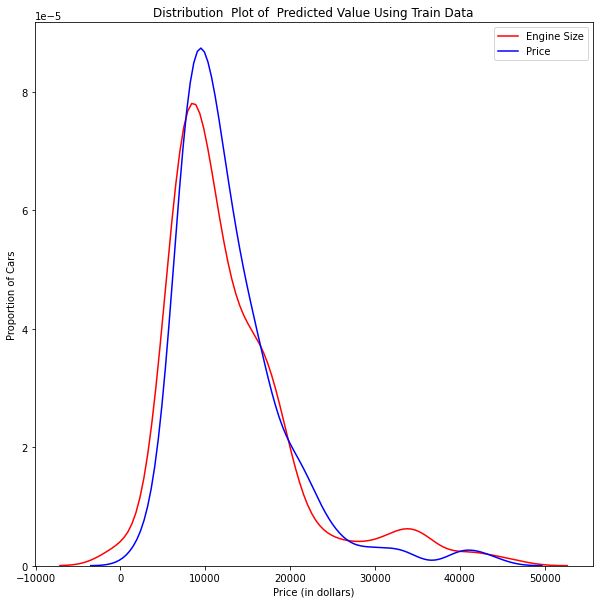

In [34]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y_train, hist=False, color="r", label='Engine Size')
ax2 = sns.distplot(yhat_train, hist=False, color="b", label='Price', ax=ax1)

plt.title('Distribution  Plot of  Predicted Value Using Train Data')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [35]:
# Multiple Linear Regression

mlr = LinearRegression()
mlr.fit(x_train[['curb_weight','engine_size', 'horsepower','city_L/100km','highway_L/100km','symboling','normalized_losses']],y_train)

LinearRegression()

In [36]:
print("training Accuracy ",mlr.score(x_train[['curb_weight','engine_size', 'horsepower','city_L/100km','highway_L/100km','symboling','normalized_losses']],y_train))
print("testing Accuracy ",mlr.score(x_test[['curb_weight','engine_size', 'horsepower','city_L/100km','highway_L/100km','symboling','normalized_losses']],y_test))

training Accuracy  0.7605887769876456
testing Accuracy  0.728928905775498


In [37]:
yhat_train = mlr.predict(x_train[['curb_weight','engine_size', 'horsepower','city_L/100km','highway_L/100km','symboling','normalized_losses']])

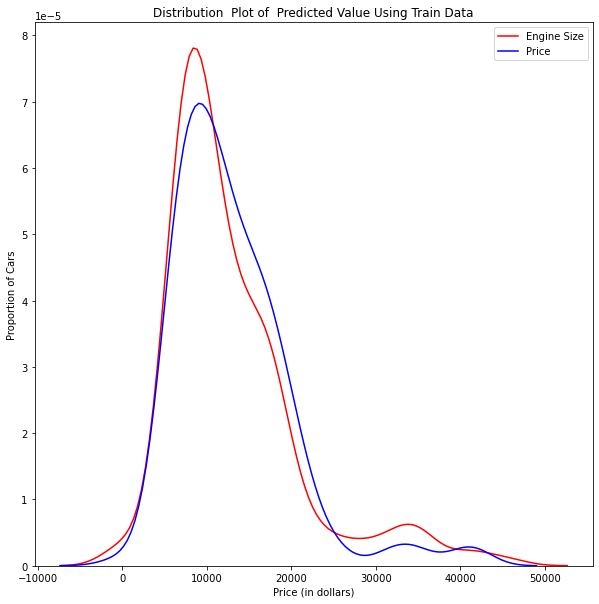

In [38]:
plt.figure(figsize=(10, 10))

ax1 = sns.distplot(y_train, hist=False, color="r", label='Engine Size')
ax2 = sns.distplot(yhat_train, hist=False, color="b", label='Price', ax=ax1)

plt.title('Distribution  Plot of  Predicted Value Using Train Data')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [39]:
# Pollynomial Regression
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

pr = PolynomialFeatures(degree=3)
x_test_pr = pr.fit_transform(x_test[['engine_size']])
x_train_pr = pr.fit_transform(x_train[['engine_size']])


In [40]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [41]:
yhat = poly.predict(x_test_pr)

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4])

Predicted values: [[ 7211.38412179]
 [11125.16170652]
 [ 7440.5801219 ]
 [ 9784.82680942]]
True values:       price
18   6295.0
45  11048.0
33   7129.0
37   9095.0


In [42]:
print("training Accuracy ",poly.score(x_train_pr,y_train))
print("testing Accuracy ",poly.score(x_test_pr,y_test))

training Accuracy  0.724463419498406
testing Accuracy  0.7043752832316418


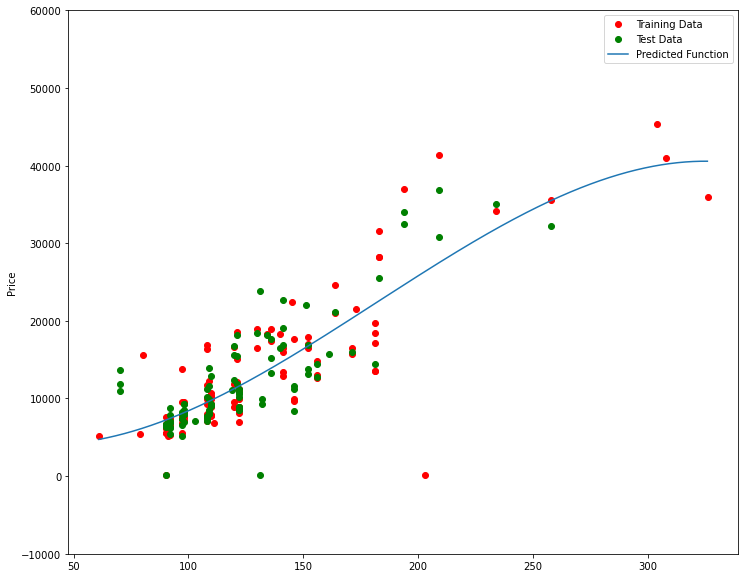

In [43]:
#Ploting polynomial regression
plt.figure(figsize=(12, 10))


xmax=max([x_train[['engine_size']].values.max(), x_test[['engine_size']].values.max()])

xmin=min([x_train[['engine_size']].values.min(), x_test[['engine_size']].values.min()])

x=np.arange(xmin, xmax, 0.1)


plt.plot(x_train[['engine_size']], y_train, 'ro', label='Training Data')
plt.plot(x_test[['engine_size']], y_test, 'go', label='Test Data')
plt.plot(x, poly.predict(pr.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
plt.ylim([-10000, 60000])
plt.ylabel('Price')
plt.legend()

In [44]:
# Ridge regression
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['curb_weight','engine_size', 'horsepower','city_L/100km','highway_L/100km','symboling','normalized_losses']])
x_test_pr=pr.fit_transform(x_test[['curb_weight','engine_size', 'horsepower','city_L/100km','highway_L/100km','symboling','normalized_losses']])

In [45]:
from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)

print("training Accuracy ",RigeModel.score(x_train_pr,y_train))
print("testing Accuracy ",RigeModel.score(x_test_pr,y_test))

training Accuracy  0.9070650585837025
testing Accuracy  0.6317401294248558


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.26911e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [46]:
yhat = RigeModel.predict(x_test_pr)

In [47]:
from sklearn.model_selection import GridSearchCV

parameters = [{'alpha' : [0.001,0.1,1, 10, 100, 1000, 10000, 100000]}]
RG = Ridge()

Grid1 = GridSearchCV(RG, parameters,cv=4)

In [48]:
Grid1.fit(x_data[['curb_weight','engine_size', 'horsepower','city_L/100km','highway_L/100km','symboling','normalized_losses']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [49]:
RR = Grid1.best_estimator_
RR

Ridge(alpha=1000)

In [50]:
# Final Ridge Regression Model
RR.fit(x_train_pr, y_train)

print("training Accuracy ",RR.score(x_train_pr,y_train))
print("testing Accuracy ",RR.score(x_test_pr,y_test))

training Accuracy  0.8915987959469711
testing Accuracy  0.7091846362346124
